Imports & Environment Setup

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

Data Loading

In [26]:
# Load dataset and handle missing file error
try:
    df = pd.read_csv('train.csv')
    print("Dataset loaded.")
except FileNotFoundError:
    print("File 'train.csv' not found.")
    df = pd.DataFrame()

Dataset loaded.


Initial Data Inspection

In [27]:
# Display basic information about the dataset if loaded
if not df.empty:
    print("DataFrame shape:", df.shape)
    print("="*50)
    print("DataFrame info:")
    df.info()
    print("="*50)
    print("First 5 rows:")
    display(df.head())

DataFrame shape: (15120, 56)
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1      

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Target Variable Distribution (Cover_Type)

Cover_Type distribution:
Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_1480\4176262838.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cover_type_distribution.index, y=cover_type_distribution.values, palette="viridis")
c:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1271: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the g

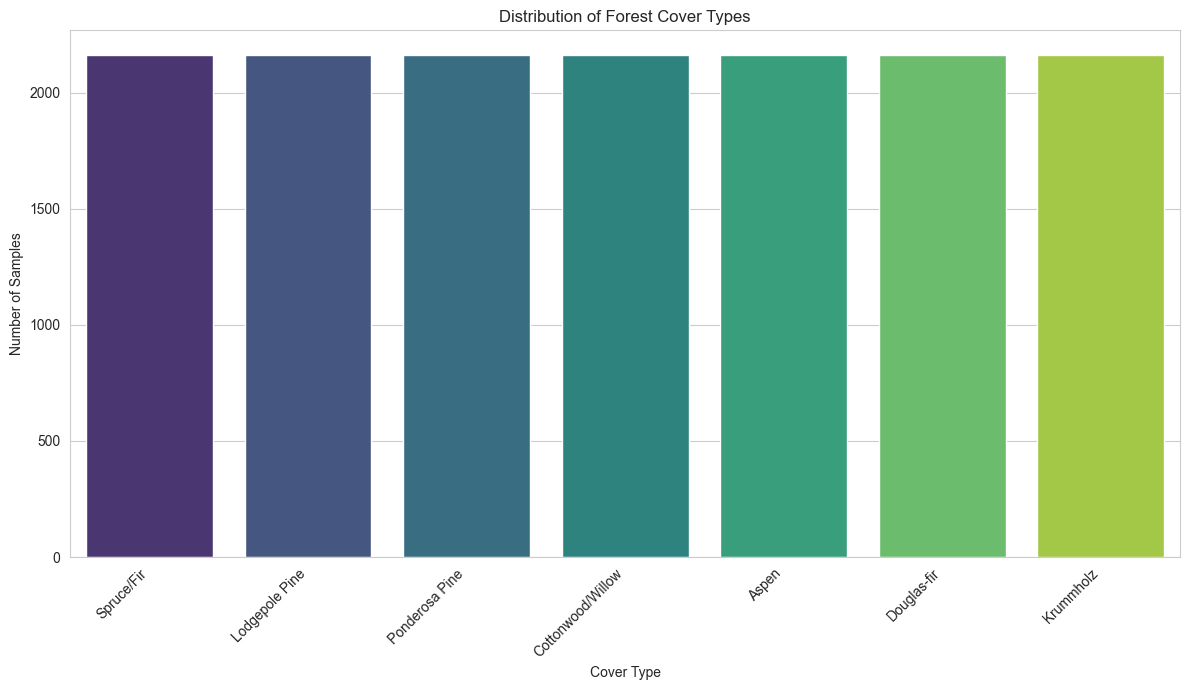

In [ ]:
# Show distribution of target variable and visualize it
if 'Cover_Type' in df.columns:
    cover_type_names = {
        1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine',
        4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'
    }
    cover_type_distribution = df['Cover_Type'].value_counts().sort_index()
    print("Cover_Type distribution:")
    print(cover_type_distribution)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=cover_type_distribution.index, y=cover_type_distribution.values, palette="viridis")
    plt.title('Distribution of Forest Cover Types')
    plt.ylabel('Number of Samples')
    plt.xlabel('Cover Type')
    plt.xticks(ticks=range(len(cover_type_names)), labels=cover_type_names.values(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Data Scaling and Preparation

In [28]:
# Prepare features and scale continuous columns
from sklearn.preprocessing import StandardScaler

if 'Id' in df.columns:
    df_prepared = df.drop('Id', axis=1)
    print("'Id' column dropped.")
else:
    df_prepared = df.copy()

# Separate features and target
X = df_prepared.drop('Cover_Type', axis=1)
y = df_prepared['Cover_Type']

# Scale first 10 columns (continuous features)
cols_to_scale = X.columns[:10]
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

print("Continuous features scaled.")
print("First 5 rows of X after scaling:")
display(X.head())

'Id' column dropped.
Continuous features scaled.
First 5 rows of X after scaling:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.37,-0.96,-1.60,0.15,-0.83,-0.91,0.27,0.57,0.28,4.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.38,-0.91,-1.72,-0.07,-0.93,-1.00,0.24,0.70,0.35,4.29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.13,-0.16,-0.89,0.19,0.23,1.11,0.70,0.83,-0.00,4.19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.09,-0.02,0.18,0.07,1.09,1.04,0.83,0.83,-0.29,4.27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.37,-1.01,-1.72,-0.35,-0.85,-1.00,0.24,0.66,0.32,4.24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Train-Test Split

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data split complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape:  {X_test.shape}")

Data split complete.
Training set shape: (12096, 54)
Testing set shape:  (3024, 54)


Model Training (LightGBM)

In [ ]:
# Train LightGBM classifier on training data
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

print("Training LightGBM classifier...")
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)
print("Training complete.")

Training LightGBM classifier...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2112
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 44
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Training complete.


Model Evaluation

In [ ]:
# Evaluate model performance on test data
print("Evaluating model on test data...")
y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=list(cover_type_names.values())))

Evaluating model on test data...
Accuracy: 0.8545 (85.45%)

Classification report:
                   precision    recall  f1-score   support

       Spruce/Fir       0.79      0.75      0.77       432
   Lodgepole Pine       0.76      0.67      0.71       432
   Ponderosa Pine       0.81      0.79      0.80       432
Cottonwood/Willow       0.97      0.98      0.97       432
            Aspen       0.88      0.95      0.91       432
      Douglas-fir       0.82      0.87      0.84       432
        Krummholz       0.94      0.98      0.96       432

         accuracy                           0.85      3024
        macro avg       0.85      0.85      0.85      3024
     weighted avg       0.85      0.85      0.85      3024

